**RNN CON LSTM**

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime
import keras

# 1. Importar los datos

Entrenamiento

In [2]:
df=pd.read_csv('Aportes.csv',parse_dates=True,index_col='Date')
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,23.6,96.0,NARE,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,26.7,95.0,NARE,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,24.0,96.0,NARE,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,0,4.6,22.4,98.0,NARE,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,1,0.0,21.0,98.0,NARE,40.62


Prueba

In [3]:
df_test=pd.read_csv('Aportes_2.csv',parse_dates=True,index_col='Date')
df_test.head(3)

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2023-09-01,-0.32,-0.87,-0.7,-0.74,-0.55,-0.09,0.55,0.85,0.77,0.42,2023,9,1.6,1,0,15.6,27.0,96.0,NARE CP,9.801
2023-09-02,-0.32,-0.87,-0.7,-0.74,-0.55,-0.09,0.55,0.85,0.77,0.42,2023,9,1.6,1,0,7.6,22.6,98.0,NARE CP,10.446
2023-09-03,-0.32,-0.87,-0.7,-0.74,-0.55,-0.09,0.55,0.85,0.77,0.42,2023,9,1.6,1,0,15.4,25.2,94.0,NARE CP,10.564


# 2. Preprocesamiento

In [4]:
df.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df_test.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal
Date,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62


In [5]:
df['ValorAnterior']=df['AporCaudal'].shift(1)
df_test['ValorAnterior']=df_test['AporCaudal'].shift(1)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62,43.80


In [6]:
df.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df_test.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,40.62,43.80


Reemplazar datos faltantes

In [7]:
df = df.fillna(df.mean())

In [8]:
df.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [9]:
rows, col = df.shape
print("El número total de registros es de: ",rows)
print("El número total de columnas es de: ",col)

El número total de registros es de:  8637
El número total de columnas es de:  14


Revisar los datos de prueba

In [10]:
df_test.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      1
dtype: int64

## 1.2 Normalizar los datos

In [11]:
dataset = df.values # Convertir a numpy array
test_data = df_test.values # Convertir a numpy array

In [12]:
training_data_len = len(dataset)  # Total de dato para entrenamiento y validación
test_data_len = len(test_data)  # Total de datos para test
print("Total de datos para entrenamiento y validación: ",training_data_len)
print("Total de datos para test: ",test_data_len)

Total de datos para entrenamiento y validación:  8637
Total de datos para test:  488


In [13]:
dataset[:,12] # Aportes

array([43.51 , 43.67 , 41.21 , ..., 32.565, 28.913, 26.057])

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_test_data = scaler.fit_transform(test_data)

## 1.3 Separar los datos de entrenamiento y validación

In [15]:
train_val_data = scaled_data

In [16]:
val_data_len = int(np.ceil(len(train_val_data) * 0.05))  # 5% de los datos de para validación
training_data = train_val_data[:-val_data_len]
val_data = train_val_data[-val_data_len:]

In [17]:
print(f"Total de datos de entrenamiento: {len(training_data)}")
print(f"Total de datos de validación: {len(val_data)}")

Total de datos de entrenamiento: 8205
Total de datos de validación: 432


In [18]:
training_data.shape

(8205, 14)

## 1.3 Crear ventana de tiempo

Datos de entrenamiento

In [19]:
X_train, y_train = [], []

window_slide = 30 # 30 días

for i in range(window_slide, len(training_data)):
    X_train.append(training_data[i-window_slide:i,:]) # Todas las variables
    y_train.append(training_data[i,12]) # Aportes
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 14))

In [20]:
X_train.shape

(8175, 30, 14)

In [21]:
y_train.shape

(8175,)

Datos de validación

In [22]:
X_val, y_val = [], []
for i in range(len(training_data), len(train_val_data)):
    X_val.append(train_val_data[i-window_slide:i, :])  # Todas la variables
    y_val.append(train_val_data[i, 12])  # Aportes

X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 14))

# 3. Construir el modelo

In [23]:
from keras import regularizers

# Definir modelo
model = keras.models.Sequential()

# Añadir capas LSTM
model.add(keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1],14), kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))

# Añadir capas densas
model.add(keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

In [25]:
model.compile(optimizer=optimizer,
              loss="mae",
              metrics=[keras.metrics.R2Score()])

# 4. Entrenar

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [27]:
training = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=40, 
                    batch_size=64, 
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 2.6207 - r2_score: 0.3627 - val_loss: 0.6924 - val_r2_score: 0.6750 - learning_rate: 0.0010
Epoch 2/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.6259 - r2_score: 0.5486 - val_loss: 0.4228 - val_r2_score: 0.7525 - learning_rate: 0.0010
Epoch 3/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4777 - r2_score: 0.6236 - val_loss: 0.3692 - val_r2_score: 0.8159 - learning_rate: 0.0010
Epoch 4/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4497 - r2_score: 0.6672 - val_loss: 0.3785 - val_r2_score: 0.7960 - learning_rate: 0.0010
Epoch 5/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4385 - r2_score: 0.6585 - val_loss: 0.3211 - val_r2_score: 0.8320 - learning_rate: 0.0010
Epoch 6/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4241 - r2_score: 0.6593 - val_loss: 0.3226 - val_r2_score: 0.8485 - learning_rate: 0.0010
Epoch 7/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4236 - r2_score: 0.

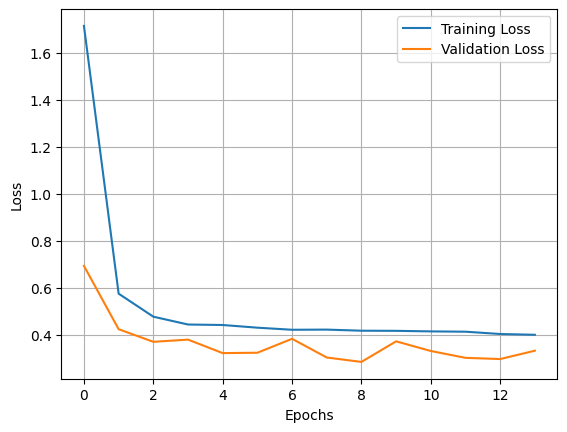

In [28]:
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 5. Resultados

In [29]:
# Preparar los datos de test
test_data = scaled_test_data[:]
X_test, y_test = [], test_data[:,12]

for i in range(window_slide, len(test_data)):
    X_test.append(test_data[i-window_slide:i])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],14))

In [30]:
predictions = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [31]:
predictions.shape

(458, 1)

In [32]:
predictions = np.repeat(predictions, 14, axis=1)
predictions_final = scaler.inverse_transform(predictions)

In [33]:
train = df[['AporCaudal']]
test =  df_test[['AporCaudal']][window_slide:]

In [34]:
predictions = predictions_final[:, 12] 

In [35]:
predictions = pd.DataFrame(predictions, index=test.index, columns=["Predictions"])

In [36]:
predictions.head(1)

,Predictions
Date,
2023-10-01,13.731733


In [37]:
test.head(1)

,AporCaudal
Date,
2023-10-01,12.841


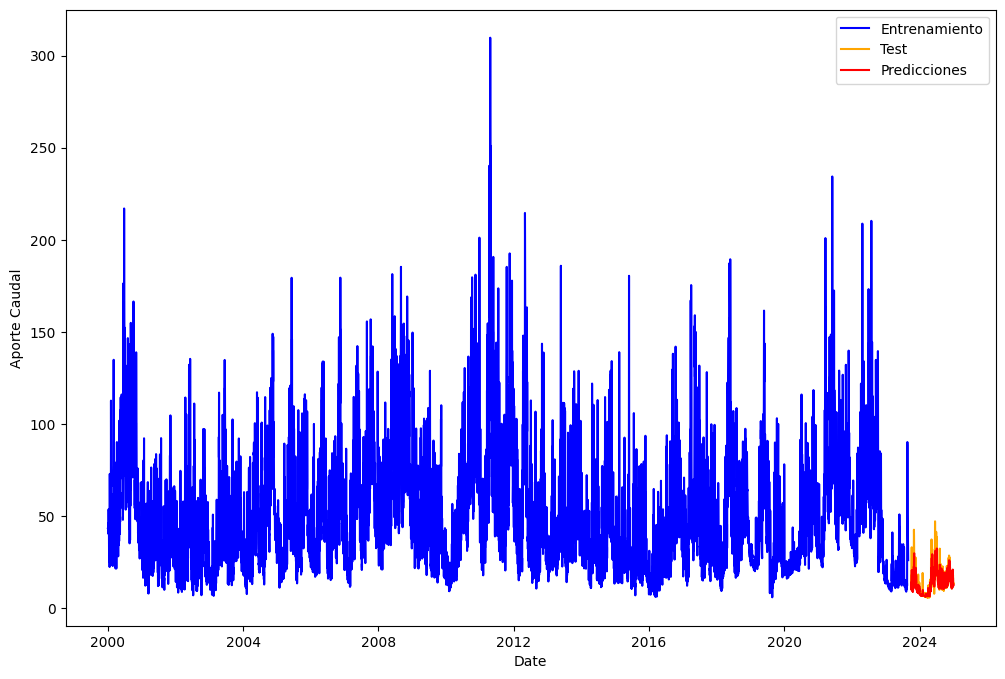

In [42]:
plt.figure(figsize=(12,8))
plt.plot(train, label="Entrenamiento", color='blue')
plt.plot(test, label="Test", color='orange')
plt.plot(predictions, label="Predicciones", color='red')
plt.xlabel("Date")
plt.ylabel("Aporte Caudal")
plt.legend()
plt.show()

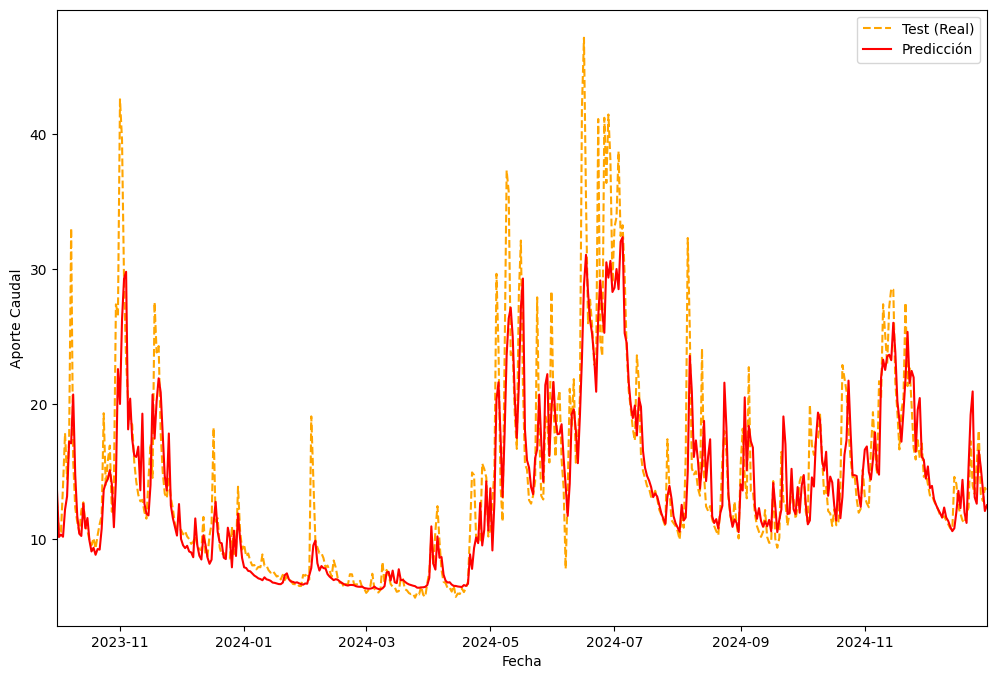

In [41]:
import matplotlib.pyplot as plt

# Definir el periodo de las predicciones
start_date = predictions.index.min()  # Primer día de las predicciones
end_date = predictions.index.max()    # Último día de las predicciones

plt.figure(figsize=(12,8))

# Graficar datos de prueba
plt.plot(test, label="Test (Real)", color='orange',linestyle='dashed')

# Graficar predicciones
plt.plot(predictions.index, predictions, label="Predicción", color='red')

# Ajustar el rango de fechas (zoom en el periodo de las predicciones)
plt.xlim(start_date, end_date)

plt.xlabel("Fecha")
plt.ylabel("Aporte Caudal")
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from math import sqrt

# Calcular MSE, MAE, RMSE y R²
mse = mean_squared_error(test['AporCaudal'], predictions['Predictions'])
mae = mean_absolute_error(test['AporCaudal'], predictions['Predictions'])
rmse = sqrt(mse)
r2 = r2_score(test['AporCaudal'], predictions['Predictions'])

# Crear un DataFrame para mostrar las métricas
metrics = {
    'Metric': ['MSE', 'MAE', 'RMSE', 'R²'],
    'Value': [mse, mae, rmse, r2]
}

metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla con las métricas
metrics_df

,Metric,Value
0,MSE,13.555361
1,MAE,2.122770
2,RMSE,3.681761
3,R²,0.750186
